<a href="https://colab.research.google.com/github/desistrom/dokumen/blob/master/sentimentanalyst2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install twint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 263 kB 7.4 MB/s 
     |████████████████████████████████| 382 kB 47.5 MB/s 
     |████████████████████████████████| 288 kB 35.9 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 59 kB 8.2 MB/s 
     |████████████████████████████████| 139 kB 66.5 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33929 sha256=237c122918133e6f25135dda11dbb4aa19f9b7b325ec56ca2b5f32a000da97fe
  Stored in directory: /root/.cache/pip/wheels/44/fc/77/99887a36b5c265a87516158858697d1a0b8f32c4d4dbddbb24
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=f7c185217d64a06471ec1e5bd4d3dc7ff482cae2c660d7d2c420f7baf1d43080
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9

In [2]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-2wrqw6f0/twint_8df7130046784711a35fab9162669203
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-2wrqw6f0/twint_8df7130046784711a35fab9162669203
  Running command git checkout -q origin/master


In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')


import twint
import nest_asyncio
nest_asyncio.apply()

import tensorflow
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
c = twint.Config()
c.Search = '"kuliah online" lang:id'
c.Limit = 1000
c.Store_csv = True
c.Output = 'tweet_data.csv'
twint.run.Search(c)

1557349668061085696 2022-08-10 12:54:29 +0000 <Padelan__> @sbmptnfess Panitia bau2 bocah kuliah online… bodoh dan berotak sma
1557347279983501312 2022-08-10 12:45:00 +0000 <Cireng021> XL Axiata emang luar biasa kalau dipke buat kuliah online zoom ga reconect teruss  #AdaUntukIndonesia
1557347279928975361 2022-08-10 12:45:00 +0000 <koiwaihs> Guyssss aku kuliah online pakenya XL Axiata nggak ngadat-ngadat alias lancar jaya sinyalnya #AdaUntukIndonesia
1557347279799025666 2022-08-10 12:45:00 +0000 <kochengnangis> Bangga banget sih pakai XL Axiata dipakai kuliah online berjam-jam pun kuotanya masih banyak, irit banget nih ga abis-abis #AdaUntukIndonesia
1557346561415614464 2022-08-10 12:42:08 +0000 <heranaraw> @convomf Ak kuliah online gk dapet samsek
1557328848450371584 2022-08-10 11:31:45 +0000 <FaizWatu> @sbmptnfess maba be like "halah kating kuliah online sok keras bangsat"
1557328393313497088 2022-08-10 11:29:57 +0000 <HMDMathUI> [SATU HARI LAGI MENUJU FORMEN 2022]  Halo, warga Depart

In [5]:
tweets_data = pd.read_csv('tweet_data.csv')
tweets = tweets_data[['id', 'username', 'created_at', 'tweet', 'replies_count', 'retweets_count', 'likes_count']]
tweets

,id,username,created_at,tweet,replies_count,retweets_count,likes_count
0,1557349668061085696,padelan__,2022-08-10 12:54:29 UTC,@sbmptnfess Panitia bau2 bocah kuliah online… ...,0,0,0
1,1557347279983501312,cireng021,2022-08-10 12:45:00 UTC,XL Axiata emang luar biasa kalau dipke buat ku...,0,0,0
2,1557347279928975361,koiwaihs,2022-08-10 12:45:00 UTC,Guyssss aku kuliah online pakenya XL Axiata ng...,0,0,0
3,1557347279799025666,kochengnangis,2022-08-10 12:45:00 UTC,Bangga banget sih pakai XL Axiata dipakai kuli...,0,0,0
4,1557346561415614464,heranaraw,2022-08-10 12:42:08 UTC,@convomf Ak kuliah online gk dapet samsek,0,0,0
...,...,...,...,...,...,...,...
471,1552988423475961856,cheeseeeburgerr,2022-07-29 12:04:27 UTC,@cherryvanillee @mamangmiwo @collegemenfess Na...,2,0,0
472,1552987897233428480,yelwtamagoyakii,2022-07-29 12:02:22 UTC,haha hihi mulu ternyata udh 2 taun jdi penjual...,1,0,0
473,1552985278742048774,ag_kupluk,2022-07-29 11:51:58 UTC,@JUNG_EUNBl kuliah online?,1,0,0
474,1552933999135272960,warwardahdah,2022-07-29 08:28:12 UTC,Gw mau kuliah online pagi aja lah gak ush offl...,0,0,0


In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
# Preprocessing tweets data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['tweet'], axis = 1, inplace = True)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
tweets.drop_duplicates(subset = 'text_clean', inplace = True)

# Export to csv file
tweets.to_csv(r'1k_tweets_data_clean.csv', index = False, header = True,index_label=None)

tweets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,username,created_at,replies_count,retweets_count,likes_count,text_clean,text_preprocessed
0,1498215726897070080,collegemenfess,2022-02-28 08:37:19 UTC,3,0,3,cm kalian yg kuliah online nya pake paket data...,"[cm, yg, kuliah, online, nya, pake, paket, dat..."
1,1498215273979015168,zonamahasiswaid,2022-02-28 08:35:31 UTC,0,0,1,walaupun surabaya sudah masuk ppkm level tida...,"[surabaya, masuk, ppkm, level, uin, sunan, amp..."
2,1498214512683786243,channettm,2022-02-28 08:32:29 UTC,0,0,0,takut bgt sm its dan sisfor,"[takut, bgt, sm, its, sisfor]"
3,1498208817552629760,sc00biepa,2022-02-28 08:09:52 UTC,0,0,0,saya dapat info dari fakultas kalo uts bisa di...,"[info, fakultas, kalo, uts, offline, mahasiswa..."
4,1498207501262614529,calonbigwinn,2022-02-28 08:04:38 UTC,0,0,0,kak chitaaa hpku memorinyaaa udah penuh buat k...,"[kak, chitaaa, hpku, memorinyaaa, udah, penuh,..."
...,...,...,...,...,...,...,...,...
917,1495058915851407363,daisyirislily,2022-02-19 15:33:17 UTC,1,0,0,iyaaa karena aku ambil kuliah online dan kalau...,"[iyaaa, ambil, kuliah, online, uas, online, gi..."
918,1495052452927729664,miratilhyt,2022-02-19 15:07:36 UTC,0,0,0,menfess lebih enakan kuliah online terus prakt...,"[menfess, enak, kuliah, online, praktikum, off..."
919,1495046308352069635,hiuorly,2022-02-19 14:43:11 UTC,0,0,0,aku gak mau kuliah online,"[gak, kuliah, online]"
920,1495045939794374659,raahayuf,2022-02-19 14:41:43 UTC,0,0,0,semenjak kuliah online ga pernah ketemu teman ...,"[semenjak, kuliah, online, ga, ketemu, teman, ..."


In [ ]:
# Because preprocessing tweets data takes a lot time, so I load tweets data which has been preprocessed before
tweets = pd.read_csv('1k_tweets_data_clean.csv')

for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = tweets['text_preprocessed'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['text_preprocessed'][i].split():
        list_words.append(word)
        
    tweets['text_preprocessed'][i] = list_words   
    
tweets

,id,username,created_at,replies_count,retweets_count,likes_count,text_clean,text_preprocessed
0,1498215726897070080,collegemenfess,2022-02-28 08:37:19 UTC,3,0,3,cm kalian yg kuliah online nya pake paket data...,"[cm, yg, kuliah, online, nya, pake, paket, dat..."
1,1498215273979015168,zonamahasiswaid,2022-02-28 08:35:31 UTC,0,0,1,walaupun surabaya sudah masuk ppkm level tida...,"[surabaya, masuk, ppkm, level, uin, sunan, amp..."
2,1498214512683786243,channettm,2022-02-28 08:32:29 UTC,0,0,0,takut bgt sm its dan sisfor,"[takut, bgt, sm, its, sisfor]"
3,1498208817552629760,sc00biepa,2022-02-28 08:09:52 UTC,0,0,0,saya dapat info dari fakultas kalo uts bisa di...,"[info, fakultas, kalo, uts, offline, mahasiswa..."
4,1498207501262614529,calonbigwinn,2022-02-28 08:04:38 UTC,0,0,0,kak chitaaa hpku memorinyaaa udah penuh buat k...,"[kak, chitaaa, hpku, memorinyaaa, udah, penuh,..."
...,...,...,...,...,...,...,...,...
890,1495058915851407363,daisyirislily,2022-02-19 15:33:17 UTC,1,0,0,iyaaa karena aku ambil kuliah online dan kalau...,"[iyaaa, ambil, kuliah, online, uas, online, gi..."
891,1495052452927729664,miratilhyt,2022-02-19 15:07:36 UTC,0,0,0,menfess lebih enakan kuliah online terus prakt...,"[menfess, enak, kuliah, online, praktikum, off..."
892,1495046308352069635,hiuorly,2022-02-19 14:43:11 UTC,0,0,0,aku gak mau kuliah online,"[gak, kuliah, online]"
893,1495045939794374659,raahayuf,2022-02-19 14:41:43 UTC,0,0,0,semenjak kuliah online ga pernah ketemu teman ...,"[semenjak, kuliah, online, ga, ketemu, teman, ..."


In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
# Results from determine sentiment polarity of tweets

results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

# Export to csv file
tweets.to_csv(r'1k_tweets_data_clean_polarity.csv', index = False, header = True,index_label=None)

tweets

negative    562
positive    257
neutral      76
Name: polarity, dtype: int64


,id,username,created_at,replies_count,retweets_count,likes_count,text_clean,text_preprocessed,polarity_score,polarity
0,1498215726897070080,collegemenfess,2022-02-28 08:37:19 UTC,3,0,3,cm kalian yg kuliah online nya pake paket data...,"[cm, yg, kuliah, online, nya, pake, paket, dat...",5,positive
1,1498215273979015168,zonamahasiswaid,2022-02-28 08:35:31 UTC,0,0,1,walaupun surabaya sudah masuk ppkm level tida...,"[surabaya, masuk, ppkm, level, uin, sunan, amp...",-9,negative
2,1498214512683786243,channettm,2022-02-28 08:32:29 UTC,0,0,0,takut bgt sm its dan sisfor,"[takut, bgt, sm, its, sisfor]",-3,negative
3,1498208817552629760,sc00biepa,2022-02-28 08:09:52 UTC,0,0,0,saya dapat info dari fakultas kalo uts bisa di...,"[info, fakultas, kalo, uts, offline, mahasiswa...",-6,negative
4,1498207501262614529,calonbigwinn,2022-02-28 08:04:38 UTC,0,0,0,kak chitaaa hpku memorinyaaa udah penuh buat k...,"[kak, chitaaa, hpku, memorinyaaa, udah, penuh,...",0,neutral
...,...,...,...,...,...,...,...,...,...,...
890,1495058915851407363,daisyirislily,2022-02-19 15:33:17 UTC,1,0,0,iyaaa karena aku ambil kuliah online dan kalau...,"[iyaaa, ambil, kuliah, online, uas, online, gi...",-7,negative
891,1495052452927729664,miratilhyt,2022-02-19 15:07:36 UTC,0,0,0,menfess lebih enakan kuliah online terus prakt...,"[menfess, enak, kuliah, online, praktikum, off...",-4,negative
892,1495046308352069635,hiuorly,2022-02-19 14:43:11 UTC,0,0,0,aku gak mau kuliah online,"[gak, kuliah, online]",-1,negative
893,1495045939794374659,raahayuf,2022-02-19 14:41:43 UTC,0,0,0,semenjak kuliah online ga pernah ketemu teman ...,"[semenjak, kuliah, online, ga, ketemu, teman, ...",-1,negative


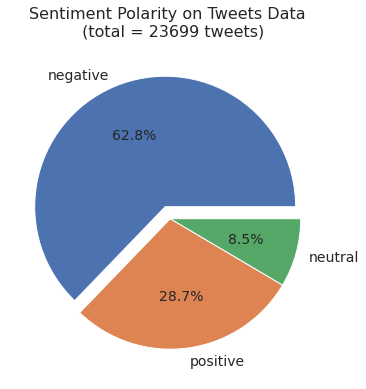

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 23699 tweets)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,ya allah hamba udah ikhlas kuliah online tp hamba mohon kuota pendidikan ya allah,19,positive
2,alhamdulillah full online lagi semester ini ya walaupun cuman smpe uts tapi aku ttep bersyukur aku pengen masih kuliah online dan alhamdulillahnya terkabul doaku,19,positive
3,duh banyak bgt yg mau diceritain sebenernya wkwk selama disini gue bersyukur bgt karena kebetulan gue jadi aslab kan nah keuntungan jadi aslab itu pastinya dapet ilmu lebih yg mungkin orang lain gak dapet gitu kan eh bener aja dong jadi gue kan kuliah online dari awal tahun,16,positive
4,ohhh semoga keterima ya aku dulu juga daftarnya pas snm so far karena aku kuliah online jadi gk begitu berasa vibe nya tapi enak kokk seru seru aja temennya pasti banyak dari berbagai tempat fasilitasnya juga oke banget ditunggu di ub ya tahun ini😍,15,positive
5,yaallah kabar duka lagi dosen gue meninggal jujur terakhir ketemu pas semester karena semester nya mulai kuliah online padahal beliau masih sehat di tahun lalu may he rest in peace 🥀💖 terimakasih banyak ilmunya bapak ❤️,14,positive
6,bokap ikut dengerin kuliah online terus dosen nya cuma perkenalan pas udah pada left dia nanya “kok gitu doang” pingin jawab ya mau apa lagi pap udah diakhiri 🤷🏻‍♀️ wkwkwk,14,positive
7,ya allah semoga materi yang aku dapat selama kuliah online ini bisa kantil nak utekku sampe besok besok besok besok sampe lulus juga gapapa 😭 pegel banget deh masa baru dikasih materi tadi nanti sore udah lupa 😭,14,positive
8,sekalinya keluar rumah loh lagi dirumah ya kuliahe libur padahal tahun udah dirumah selama kuliah online,14,positive
9,kenapa wifi rumah pas aku udh ngekos lagi dia jadi lancar jaya pdhl pas jaman kuliah online ngadat ngadat mulu hhhh,13,positive
10,kayaknya tetangga pada gatau gw ada di rumah sekalinya keluar tuh pada nanya loh ada di rumah mikirnya gw kerja soalnya sering ditanyain kerja dimana bcs rata lulusan sma di lingkunganku pada langsung kerja padahal gw kuliah online tiap hari di rumahhh 😭👍🏻,13,positive


In [ ]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,besok udh mulai kelas tp matkul yg ke enroll baru dari ga bisa login portal kuliah online nya jg tulisan nya salah cara login padahal udh sesuai sm caranya bingung salah dibelah mana nya sih anjir katanya lg error semoga aja emg error dah bukan gara gara bayaran 😔,-38,negative
2,perkara grup matkul waktu kuliah online bisa jadi ajang menjatuhkan gk sih ntar dosennya ngira kita gk niat kuliah karena gak masuk grup sedangkan temen yg lain udh masuk grup padahal mah kaga dibagi link grupnya anjir,-37,negative
3,tibatiba kepalaku pusing tenggorokan sakit badan panas bgt menggigil kedinginan tapi posisi aku masih presentasi kuliahonline yaudah deh sambil nahan sakit ttp lajut presentasi dan setelah asar langsung tumbang dahtidur sampe maghrib trus habis isya aku minum paracetamol,-33,negative
4,kalian yg kuliah online pernah izin ga kuliah gitu ga bukan bolos kyk izin atau sakit gitu aku dr awal tiap sakit maksain mulu akhirnya jd ngedrop skrg jg gitu td muntah,-25,negative
5,day selfquarantine gak tau kenapa hari ini tuh sakit kepala udh minum paracetamol tapi gak ngaruh ntah karna kuliah online sama kerjaan atau karna stress isoman atau apa gak tau juga yang jelas ampe skrg dari tadi siang masih sakit kepala,-25,negative
6,sama nder dulu ada nih di rumah gua mahluk sialan kayak adek lu pengen gua parang ajg palanya alarm kenceng setengah mati kaga bangun dibangunin orang tua malah ngamuk telat kuliah online ngamuk juga ngnttttttt pengen gua ancurin hp sama kepalanya,-25,negative
7,rada sedih musibah dateng pas lagi miskin miskinnya mana kena laptop nyamotornya remuk 💔💔 mana masa kuliah online 😔 maybe teguran biar makin mendekatkan diri ke allah ☺️,-24,negative
8,hari ini meriang panas dingin demam sakit kepala radang tenggorokan badan linulinu sangat tidak enak kak chita kuliah online pun izin offcam sambil rebahan krna ga bisa duduk klau duduk pusing cuaca disini tak menentu kadang cerah hujan berawan,-23,negative
9,ini aku tau gara sering baca reply anak ya bultang bulu tangkis ordal orang dlam orkay orang kaya rakjel rakyat jelata wacol water color kulon kuliah online aneh emang bahasa anak jaman sekarang,-21,negative
10,atasan gue juga gini😭 baik bangettt kalo gue lagi kuliah online gapernah di ganggu atau disuruh ini itu bilangnya yaudah kuliah dulu lebih penting🥺,-19,negative


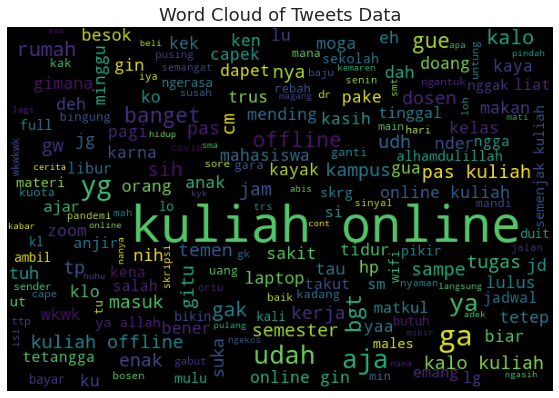

In [ ]:
list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [ ]:
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

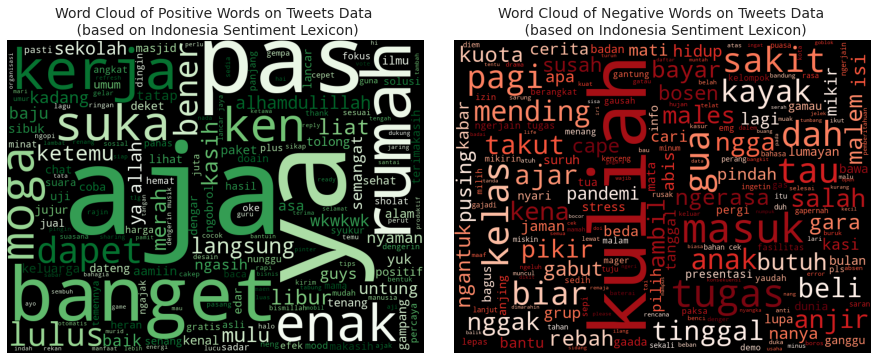

In [ ]:
# Visualize positive and negative word cloud

sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

                      id         username  ... polarity_score  polarity
0    1498215726897070080   collegemenfess  ...              5  positive
1    1498215273979015168  zonamahasiswaid  ...             -9  negative
2    1498214512683786243        channettm  ...             -3  negative
3    1498208817552629760        sc00biepa  ...             -6  negative
4    1498207501262614529     calonbigwinn  ...              0   neutral
..                   ...              ...  ...            ...       ...
890  1495058915851407363    daisyirislily  ...             -7  negative
891  1495052452927729664       miratilhyt  ...             -4  negative
892  1495046308352069635          hiuorly  ...             -1  negative
893  1495045939794374659         raahayuf  ...             -1  negative
894  1495041064062709760   iammeremortals  ...             -9  negative

[895 rows x 10 columns]
00:00:00    24
01:00:00    59
02:00:00    52
03:00:00    61
04:00:00    49
05:00:00    50
06:00:00    43
07:00:

ValueError: ignored

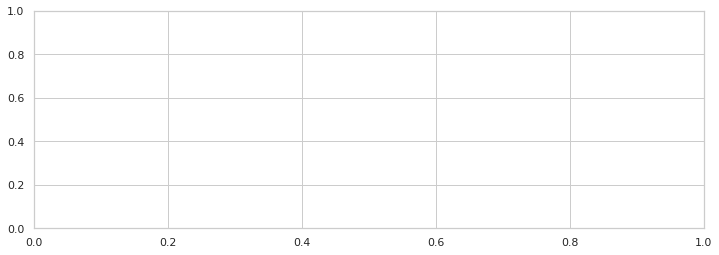

In [ ]:
# Visualize counts of tweets created based on hours

pd.plotting.register_matplotlib_converters()
tweets_created = pd.DataFrame()
tweets_created['created_at'] = tweets['created_at'].str.split(' ', expand = True)[1]
tweets_created['created_at'] = pd.to_datetime(tweets_created['created_at'])
tweets_created['created_at']= tweets_created['created_at'].dt.round('H')
tweets_created['created_at'] = tweets_created['created_at'].dt.time
tweets_created

fig, ax = plt.subplots(figsize = (12, 4))
x_values = tweets_created['created_at'].value_counts().sort_index().index
y_values = tweets_created['created_at'].value_counts().sort_index()
print(tweets)
print(y_values)
sns.lineplot(ax = ax, data = tweets, x = x_values, y = y_values)
# ax.set_title('Count of Tweets Created \n (based on hours)', fontsize = 18)
# ax.set_xlabel('Hours')
# ax.set_xticks(x_values)
# ax.set_xticklabels(x_values, rotation = 45)
# ax.set_ylabel('Count')
# plt.show()

In [ ]:
# Make text preprocessed (tokenized) to untokenized with toSentence Function
X = tweets['text_preprocessed'].apply(toSentence) 
max_features = 5000

# Tokenize text with specific maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

(895, 46)

In [ ]:
# Encode target data into numerical values
polarity_encode = {'negative' : 0, 'neutral' : 1, 'positive' : 2}
y = tweets['polarity'].map(polarity_encode).values

# Split the data (with composition data train 80%, data test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(716, 46) (716,)
(179, 46) (179,)
